# 1.DATA CLEANING

# Importing Data

In [1]:
import pyforest
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("c://Users/RENUKA SREENIVAS/Downloads/Loan payments data.csv")
data.head()

<IPython.core.display.Javascript object>

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [3]:
data.nunique()

Loan_ID           500
loan_status         3
Principal           6
terms               3
effective_date      7
due_date           25
paid_off_time     320
past_due_days      33
age                33
education           4
Gender              2
dtype: int64

In [4]:
data=data.drop_duplicates()

In [5]:
data.shape

(500, 11)

# Converting Features into Pandas Date Time

In [6]:
for column in ['effective_date', 'due_date', 'paid_off_time']:
        data[column] = pd.to_datetime(data[column])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
data['effective_day'] = data['effective_date'].apply(lambda x: x.day)
data['due_month'] = data['due_date'].apply(lambda x: x.month)
data['due_day'] = data['due_date'].apply(lambda x: x.day)
data['paid_off_month'] = data['paid_off_time'].apply(lambda x: x.month)
data['paid_off_day'] = data['paid_off_time'].apply(lambda x: x.day)
data['paid_off_hour'] = data['paid_off_time'].apply(lambda x: x.hour)
data['paid_off_month'] = data['paid_off_time'].apply(lambda x: x.month)
data['paid_off_minute'] = data['paid_off_time'].apply(lambda x: x.minute)

# Dropping Unecessary columns

In [8]:
data=data.drop(['effective_date', 'due_date', 'paid_off_time','Loan_ID'],axis=1)

In [9]:
data.head(3)

,loan_status,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
0,PAIDOFF,1000,30,NaN,45,High School or Below,male,8,10,7,9.0,14.0,19.0,31.0
1,PAIDOFF,1000,30,NaN,50,Bechalor,female,8,10,7,10.0,7.0,9.0,0.0
2,PAIDOFF,1000,30,NaN,33,Bechalor,female,8,10,7,9.0,25.0,16.0,58.0


In [10]:
data.shape

(500, 14)

# Finding NULL VALUES in dataset

In [11]:
data.isnull().sum()

loan_status          0
Principal            0
terms                0
past_due_days      300
age                  0
education            0
Gender               0
effective_day        0
due_month            0
due_day              0
paid_off_month     100
paid_off_day       100
paid_off_hour      100
paid_off_minute    100
dtype: int64

In [12]:
data.describe()

,Principal,terms,past_due_days,age,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
count,500.000000,500.000000,200.00000,500.000000,500.000000,500.000000,500.000000,400.000000,400.000000,400.00000,400.000000
mean,943.200000,22.824000,36.01000,31.116000,11.410000,9.622000,16.642000,9.600000,17.210000,13.44500,20.472500
std,115.240274,8.000064,29.38088,6.084784,1.091918,0.569002,7.406453,0.648886,7.744407,4.64121,19.847646
min,300.000000,7.000000,1.00000,18.000000,8.000000,9.000000,7.000000,9.000000,1.000000,0.00000,0.000000
25%,1000.000000,15.000000,3.00000,27.000000,11.000000,9.000000,10.000000,9.000000,10.000000,9.00000,0.000000
50%,1000.000000,30.000000,37.00000,30.000000,11.000000,10.000000,11.500000,10.000000,15.500000,13.00000,17.000000
75%,1000.000000,30.000000,60.00000,35.000000,12.000000,10.000000,25.000000,10.000000,25.000000,16.00000,38.250000
max,1000.000000,30.000000,76.00000,51.000000,14.000000,11.000000,28.000000,12.000000,31.000000,23.00000,59.000000


In [13]:
data["paid_off_month"]=data["paid_off_month"].fillna(data["paid_off_month"].median())
data["paid_off_day"]=data["paid_off_day"].fillna(17)
data["paid_off_hour"]=data["paid_off_hour"].fillna(data["paid_off_hour"].median())
data["paid_off_minute"]=data["paid_off_minute"].fillna(data["paid_off_minute"].median())
data["past_due_days"]=data["past_due_days"].fillna(data["past_due_days"].median())

In [14]:
data.isnull().sum()

loan_status        0
Principal          0
terms              0
past_due_days      0
age                0
education          0
Gender             0
effective_day      0
due_month          0
due_day            0
paid_off_month     0
paid_off_day       0
paid_off_hour      0
paid_off_minute    0
dtype: int64

# Visuals of Outliers

<IPython.core.display.Javascript object>

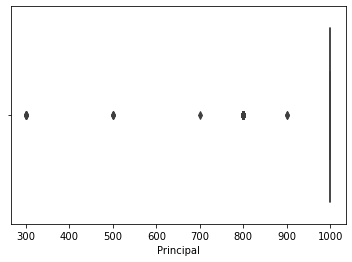

In [15]:
sns.boxplot(data["Principal"])

<IPython.core.display.Javascript object>

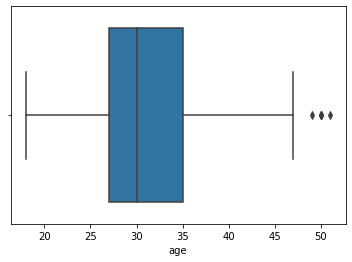

In [16]:
sns.boxplot(data["age"])

<IPython.core.display.Javascript object>

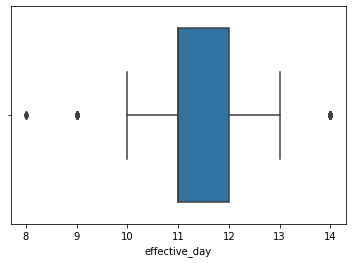

In [17]:
sns.boxplot(data["effective_day"])

<IPython.core.display.Javascript object>

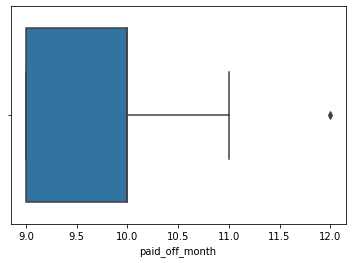

In [18]:
sns.boxplot(data["paid_off_month"])

<IPython.core.display.Javascript object>

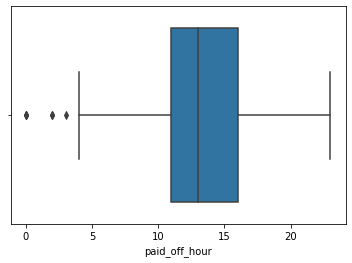

In [19]:
sns.boxplot(data["paid_off_hour"])

<IPython.core.display.Javascript object>

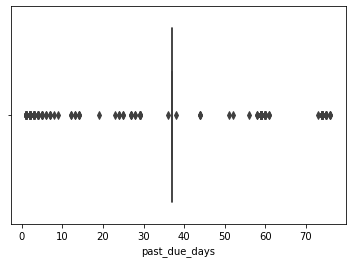

In [20]:
sns.boxplot(data["past_due_days"])

# Statistical Measures to find Outliers

# 1.Inter Quartile Region

In [21]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Principal           0.0
terms              15.0
past_due_days       0.0
age                 8.0
effective_day       1.0
due_month           1.0
due_day            15.0
paid_off_month      1.0
paid_off_day       13.0
paid_off_hour       5.0
paid_off_minute    32.0
dtype: float64


In [22]:
cut_off = IQR * 1.5
lower, upper = Q1 - cut_off, Q3 + cut_off

In [23]:
lower

Principal          1000.0
terms                -7.5
past_due_days        37.0
age                  15.0
effective_day         9.5
due_month             7.5
due_day             -12.5
paid_off_month        7.5
paid_off_day         -8.5
paid_off_hour         3.5
paid_off_minute     -47.0
dtype: float64

In [24]:
upper

Principal          1000.0
terms                52.5
past_due_days        37.0
age                  47.0
effective_day        13.5
due_month            11.5
due_day              47.5
paid_off_month       11.5
paid_off_day         43.5
paid_off_hour        23.5
paid_off_minute      81.0
dtype: float64

In [25]:
print((data<lower)|(data>upper))

     Gender  Principal    age  due_day  due_month  education  effective_day  \
0     False      False  False    False      False      False           True   
1     False      False   True    False      False      False           True   
2     False      False  False    False      False      False           True   
3     False      False  False    False      False      False           True   
4     False      False  False    False      False      False           True   
..      ...        ...    ...      ...        ...        ...            ...   
495   False      False  False    False      False      False          False   
496   False      False  False    False      False      False          False   
497   False       True  False    False      False      False          False   
498   False      False  False    False      False      False          False   
499   False      False  False    False      False      False          False   

     loan_status  paid_off_day  paid_off_hour  paid

# 2. Z Score

In [26]:
from scipy import stats
import numpy as np
x=data[["Principal","terms",'past_due_days','age','effective_day','due_month','due_day',
        'paid_off_month','paid_off_day','paid_off_hour','paid_off_minute']]
z = np.abs(stats.zscore(x))
print(z)

[[0.49337687 0.89789115 0.021357   ... 0.45789252 1.3600488  0.63100262]
 [0.49337687 0.89789115 0.021357   ... 1.46964998 1.04967622 1.11209854]
 [0.49337687 0.89789115 0.021357   ... 1.13201206 0.6371313  2.1491875 ]
 ...
 [1.24386563 0.97897162 1.81232478 ... 1.71015918 0.56773122 1.64312587]
 [0.49337687 0.89789115 1.92018842 ... 0.89150286 2.08296631 1.13706424]
 [0.49337687 0.89789115 1.5426657  ... 0.26479138 0.56773122 2.1491875 ]]


In [27]:
threshold = 3
print(np.where(z > 3))

(array([  0,   1,   1,   2,   3,   5,  10,  49,  68,  92, 147, 152, 181,
       208, 216, 253, 260, 262, 278, 342, 429, 469], dtype=int64), array([4, 3, 4, 4, 4, 0, 0, 3, 0, 9, 0, 0, 0, 0, 3, 0, 3, 9, 9, 3, 0, 7],
      dtype=int64))


In [28]:
z[0][4]

3.126073225240226

# Dropping Outliers

In [29]:
data = data[(z < 3).all(axis=1)]

In [30]:
data.head(3)

,loan_status,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
4,PAIDOFF,1000,30,37.0,28,college,female,9,10,8,9.0,23.0,21.0,36.0
6,PAIDOFF,1000,30,37.0,29,college,male,9,10,8,10.0,7.0,23.0,7.0
7,PAIDOFF,1000,30,37.0,36,college,male,9,10,8,10.0,5.0,20.0,33.0


In [31]:
#Shape od data after dropping Outliers
data.shape

(479, 14)

# 2.Exploratory Data Analysis

In [32]:
data.head()

,loan_status,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
4,PAIDOFF,1000,30,37.0,28,college,female,9,10,8,9.0,23.0,21.0,36.0
6,PAIDOFF,1000,30,37.0,29,college,male,9,10,8,10.0,7.0,23.0,7.0
7,PAIDOFF,1000,30,37.0,36,college,male,9,10,8,10.0,5.0,20.0,33.0
8,PAIDOFF,1000,30,37.0,28,college,male,9,10,8,10.0,8.0,16.0,0.0
9,PAIDOFF,800,15,37.0,26,college,male,10,9,24,9.0,24.0,13.0,0.0


In [33]:
#To get shape of dataset
data.shape

(479, 14)

In [34]:
#To get index of dataset
data.index

Int64Index([  4,   6,   7,   8,   9,  11,  12,  13,  14,  15,
            ...
            490, 491, 492, 493, 494, 495, 496, 497, 498, 499],
           dtype='int64', length=479)

In [35]:
#To get columns of dataset
data.columns

Index(['loan_status', 'Principal', 'terms', 'past_due_days', 'age',
       'education', 'Gender', 'effective_day', 'due_month', 'due_day',
       'paid_off_month', 'paid_off_day', 'paid_off_hour', 'paid_off_minute'],
      dtype='object')

In [36]:
# To get count of each feature in data
data.count()

loan_status        479
Principal          479
terms              479
past_due_days      479
age                479
education          479
Gender             479
effective_day      479
due_month          479
due_day            479
paid_off_month     479
paid_off_day       479
paid_off_hour      479
paid_off_minute    479
dtype: int64

In [37]:
#to get the type of data
data.dtypes

loan_status         object
Principal            int64
terms                int64
past_due_days      float64
age                  int64
education           object
Gender              object
effective_day        int64
due_month            int64
due_day              int64
paid_off_month     float64
paid_off_day       float64
paid_off_hour      float64
paid_off_minute    float64
dtype: object

In [38]:
#To get number of unique values in each feature of dataset
data.nunique()

loan_status         3
Principal           4
terms               3
past_due_days      33
age                31
education           4
Gender              2
effective_day       6
due_month           3
due_day            17
paid_off_month      3
paid_off_day       31
paid_off_hour      22
paid_off_minute    59
dtype: int64

In [39]:
#To get basic info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 479 entries, 4 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_status      479 non-null    object 
 1   Principal        479 non-null    int64  
 2   terms            479 non-null    int64  
 3   past_due_days    479 non-null    float64
 4   age              479 non-null    int64  
 5   education        479 non-null    object 
 6   Gender           479 non-null    object 
 7   effective_day    479 non-null    int64  
 8   due_month        479 non-null    int64  
 9   due_day          479 non-null    int64  
 10  paid_off_month   479 non-null    float64
 11  paid_off_day     479 non-null    float64
 12  paid_off_hour    479 non-null    float64
 13  paid_off_minute  479 non-null    float64
dtypes: float64(5), int64(6), object(3)
memory usage: 56.1+ KB


In [40]:
#To get statistical measures of numerical features in dataset
data.describe()

,Principal,terms,past_due_days,age,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
count,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
mean,954.697286,23.127349,36.553236,30.916493,11.427975,9.636743,16.580376,9.695198,17.229645,13.392484,19.536534
std,83.927284,7.833416,18.802786,5.773743,1.046278,0.569065,7.421931,0.591960,6.946107,3.989057,17.761502
min,700.000000,7.000000,1.000000,18.000000,9.000000,9.000000,7.000000,9.000000,1.000000,2.000000,0.000000
25%,1000.000000,15.000000,37.000000,27.000000,11.000000,9.000000,10.000000,9.000000,11.000000,11.000000,1.000000
50%,1000.000000,30.000000,37.000000,30.000000,11.000000,10.000000,11.000000,10.000000,17.000000,13.000000,17.000000
75%,1000.000000,30.000000,37.000000,35.000000,12.000000,10.000000,25.000000,10.000000,24.000000,16.000000,33.000000
max,1000.000000,30.000000,76.000000,49.000000,14.000000,11.000000,28.000000,11.000000,31.000000,23.000000,59.000000


In [41]:
#Includes categorical features description
data.describe(include="all")

,loan_status,Principal,terms,past_due_days,age,education,Gender,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
count,479,479.000000,479.000000,479.000000,479.000000,479,479,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000,479.000000
unique,3,NaN,NaN,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,PAIDOFF,NaN,NaN,NaN,NaN,college,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,282,NaN,NaN,NaN,NaN,213,406,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,954.697286,23.127349,36.553236,30.916493,NaN,NaN,11.427975,9.636743,16.580376,9.695198,17.229645,13.392484,19.536534
std,NaN,83.927284,7.833416,18.802786,5.773743,NaN,NaN,1.046278,0.569065,7.421931,0.591960,6.946107,3.989057,17.761502
min,NaN,700.000000,7.000000,1.000000,18.000000,NaN,NaN,9.000000,9.000000,7.000000,9.000000,1.000000,2.000000,0.000000
25%,NaN,1000.000000,15.000000,37.000000,27.000000,NaN,NaN,11.000000,9.000000,10.000000,9.000000,11.000000,11.000000,1.000000
50%,NaN,1000.000000,30.000000,37.000000,30.000000,NaN,NaN,11.000000,10.000000,11.000000,10.000000,17.000000,13.000000,17.000000
75%,NaN,1000.000000,30.000000,37.000000,35.000000,NaN,NaN,12.000000,10.000000,25.000000,10.000000,24.000000,16.000000,33.000000


# Univariate Analysis

In [42]:
#To get number of unique value counts in the feature
data["loan_status"].value_counts()

PAIDOFF               282
COLLECTION             99
COLLECTION_PAIDOFF     98
Name: loan_status, dtype: int64

In [43]:
data["Principal"].unique()

array([1000,  800,  900,  700], dtype=int64)

In [44]:
data["terms"].unique()

array([30, 15,  7], dtype=int64)

In [45]:
data["terms"].value_counts()

30    267
15    198
7      14
Name: terms, dtype: int64

In [46]:
data["past_due_days"].unique()

array([37., 76., 61., 75., 60., 59., 74., 29., 44., 58., 73., 28.,  2.,
        4., 13.,  5.,  3., 12., 27.,  1., 25., 24., 36.,  7., 14., 23.,
        6., 38., 19., 51.,  9., 56.,  8.])

In [47]:
data["age"].unique()

array([28, 29, 36, 26, 39, 27, 40, 32, 43, 25, 34, 31, 33, 37, 24, 21, 30,
       35, 22, 44, 45, 46, 38, 23, 20, 47, 42, 19, 41, 18, 49],
      dtype=int64)

In [48]:
data["education"].value_counts()

college                 213
High School or Below    201
Bechalor                 64
Master or Above           1
Name: education, dtype: int64

In [49]:
data["Gender"].value_counts()

male      406
female     73
Name: Gender, dtype: int64

In [50]:
data["effective_day"].unique()

array([ 9, 10, 11, 12, 13, 14], dtype=int64)

In [51]:
data["due_month"].unique()

array([10,  9, 11], dtype=int64)

In [52]:
data["due_day"].unique()

array([ 8, 24,  9, 16, 10, 25, 17, 26, 11, 18, 19, 12, 27, 28, 13, 23,  7],
      dtype=int64)

In [53]:
data["paid_off_day"].unique()

array([23.,  7.,  5.,  8., 24.,  9., 13., 15., 27.,  3., 29., 21., 22.,
       25., 10., 20., 12., 30., 17.,  6., 16., 26.,  1., 11., 19., 14.,
        4., 28., 18.,  2., 31.])

In [54]:
data["paid_off_hour"].unique()

array([21., 23., 20., 16., 13., 14., 18., 22.,  7.,  9., 17., 12.,  8.,
       19., 11., 15.,  4.,  2.,  6.,  5., 10.,  3.])

In [55]:
data["paid_off_month"].value_counts()

10.0    267
9.0     179
11.0     33
Name: paid_off_month, dtype: int64

In [56]:
data["paid_off_minute"].unique()

array([36.,  7., 33.,  0., 32., 57., 27., 21., 49.,  5., 42.,  9., 50.,
       18., 16., 17., 41., 48., 44., 24., 29., 14., 53., 34., 40., 38.,
       12., 25.,  4.,  1., 35., 43., 55., 15., 31., 19., 47., 39., 23.,
       56., 58.,  2., 13., 26., 45., 28., 51., 30.,  3., 52., 22., 59.,
       37., 10., 46.,  6., 20., 54.,  8.])

# BiVariate Analysis

In [57]:
data[data["loan_status"]=="COLLECTION_PAIDOFF"]["Gender"].value_counts()

male      84
female    14
Name: Gender, dtype: int64

In [58]:
data[data["loan_status"]=="PAIDOFF"]["Gender"].value_counts()

male      233
female     49
Name: Gender, dtype: int64

In [59]:
data[data["loan_status"]=="COLLECTION"]["Gender"].value_counts()

male      89
female    10
Name: Gender, dtype: int64

In [60]:
data[data["loan_status"]=="COLLECTION_PAIDOFF"]["education"].value_counts()

college                 48
High School or Below    36
Bechalor                14
Name: education, dtype: int64

In [61]:
data[data["loan_status"]=="PAIDOFF"]["education"].value_counts()

college                 126
High School or Below    116
Bechalor                 39
Master or Above           1
Name: education, dtype: int64

In [62]:
data[data["loan_status"]=="COLLECTION"]["education"].value_counts()

High School or Below    49
college                 39
Bechalor                11
Name: education, dtype: int64

In [63]:
data[data["Gender"]=="female"]["Principal"].value_counts()

1000    55
800     17
900      1
Name: Principal, dtype: int64

In [64]:
data[data["Gender"]=="male"]["Principal"].value_counts()

1000    315
800      89
900       1
700       1
Name: Principal, dtype: int64

# MultiVariate Analysis

In [65]:
data[(data["Gender"]=="female")&(data["Principal"]==1000)][["education","loan_status","age"]]

,education,loan_status,age
4,college,PAIDOFF,28
21,High School or Below,PAIDOFF,43
40,college,PAIDOFF,32
44,Bechalor,PAIDOFF,24
51,Bechalor,PAIDOFF,35
72,Bechalor,PAIDOFF,33
78,college,PAIDOFF,37
79,High School or Below,PAIDOFF,44
84,High School or Below,PAIDOFF,37
86,High School or Below,PAIDOFF,24


In [66]:
data[(data["Gender"]=="male")&(data["Principal"]==1000)][["education","loan_status","age"]]

,education,loan_status,age
6,college,PAIDOFF,29
7,college,PAIDOFF,36
8,college,PAIDOFF,28
11,High School or Below,PAIDOFF,39
12,college,PAIDOFF,26
...,...,...,...
493,college,COLLECTION_PAIDOFF,29
494,High School or Below,COLLECTION_PAIDOFF,30
495,High School or Below,COLLECTION_PAIDOFF,28
496,High School or Below,COLLECTION_PAIDOFF,26


In [67]:
data[data["age"]<=30][["loan_status","Principal","Gender"]].count()

loan_status    262
Principal      262
Gender         262
dtype: int64

In [68]:
data[data["age"]<=20][["loan_status","Principal","Gender"]]

,loan_status,Principal,Gender
122,PAIDOFF,1000,male
139,PAIDOFF,1000,male
204,PAIDOFF,1000,male
245,PAIDOFF,1000,female
259,PAIDOFF,1000,male
313,COLLECTION,1000,male
371,COLLECTION,1000,male


# Grouping Data By Features

In [69]:
a=data.groupby("Gender")
a["loan_status"].value_counts()

Gender  loan_status       
female  PAIDOFF                49
        COLLECTION_PAIDOFF     14
        COLLECTION             10
male    PAIDOFF               233
        COLLECTION             89
        COLLECTION_PAIDOFF     84
Name: loan_status, dtype: int64

In [70]:
a=data.groupby("education")
a["loan_status"].value_counts()

education             loan_status       
Bechalor              PAIDOFF                39
                      COLLECTION_PAIDOFF     14
                      COLLECTION             11
High School or Below  PAIDOFF               116
                      COLLECTION             49
                      COLLECTION_PAIDOFF     36
Master or Above       PAIDOFF                 1
college               PAIDOFF               126
                      COLLECTION_PAIDOFF     48
                      COLLECTION             39
Name: loan_status, dtype: int64

# 3.DATA VISUALISATION

# 1.Graphical Univariate Analysis

<IPython.core.display.Javascript object>

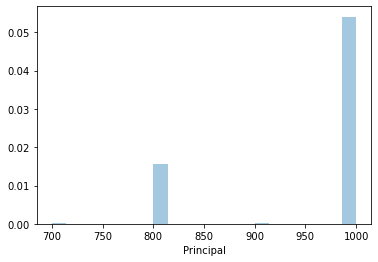

In [71]:
sns.distplot(data["Principal"])

<IPython.core.display.Javascript object>

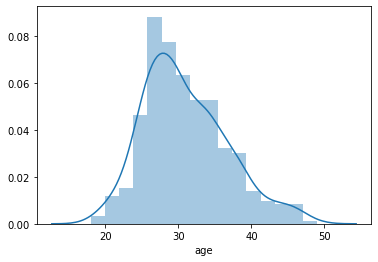

In [72]:
sns.distplot(data["age"])

<IPython.core.display.Javascript object>

(array([282.,   0.,   0.,   0.,   0.,  99.,   0.,   0.,   0.,  98.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

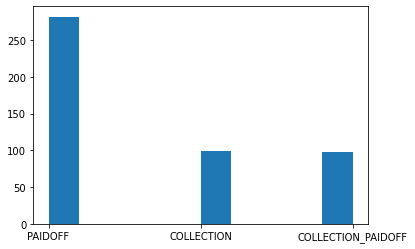

In [73]:
plt.hist(data["loan_status"])

<IPython.core.display.Javascript object>

(array([ 73.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 406.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

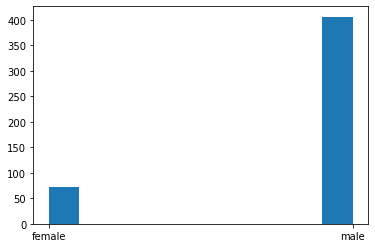

In [74]:
plt.hist(data["Gender"])

<IPython.core.display.Javascript object>

(array([ 14.,   0.,   0., 198.,   0.,   0.,   0.,   0.,   0., 267.]),
 array([ 7. ,  9.3, 11.6, 13.9, 16.2, 18.5, 20.8, 23.1, 25.4, 27.7, 30. ]),
 <a list of 10 Patch objects>)

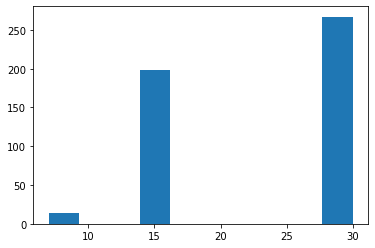

In [75]:
plt.hist(data["terms"])

<IPython.core.display.Javascript object>

(array([213.,   0.,   0., 201.,   0.,   0.,  64.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

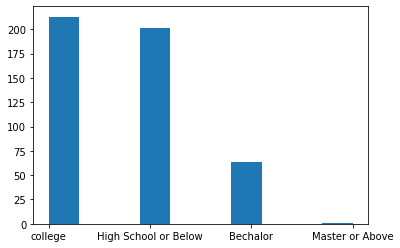

In [76]:
plt.hist(data["education"])

# Graphical BiVariate Analysis

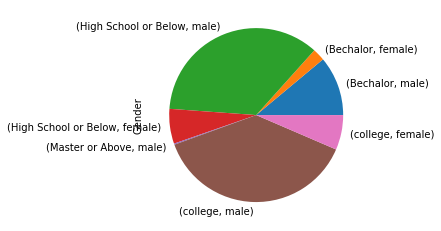

In [77]:
d=data.groupby("education")
d["Gender"].value_counts().plot(kind="pie")

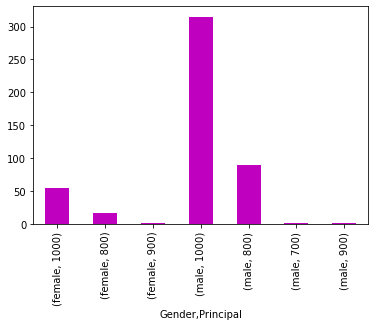

In [78]:
e=data.groupby("Gender")
e["Principal"].value_counts().plot(kind="bar",color="M")   #k k gives black color

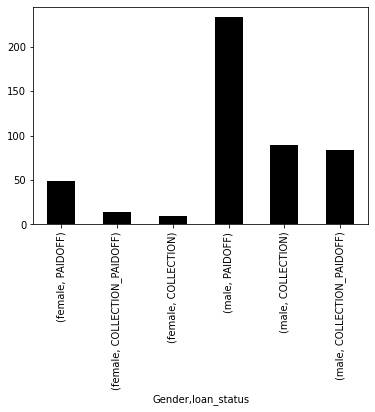

In [79]:
e=data.groupby("Gender")
e["loan_status"].value_counts().plot(kind="bar",color="k")   #k k gives black color

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

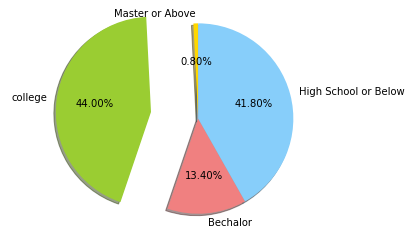

In [80]:
# Data to plot
labels = 'Master or Above', 'college', 'Bechalor', 'High School or Below'
sizes = [4,220,67,209]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.5, 0, 0) # explode 1st slice
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
 autopct='%1.2f%%',shadow=True, startangle=90)  #.1f gives one value after decimal point
plt.axis('equal')
plt.show() 

# SubPlots

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

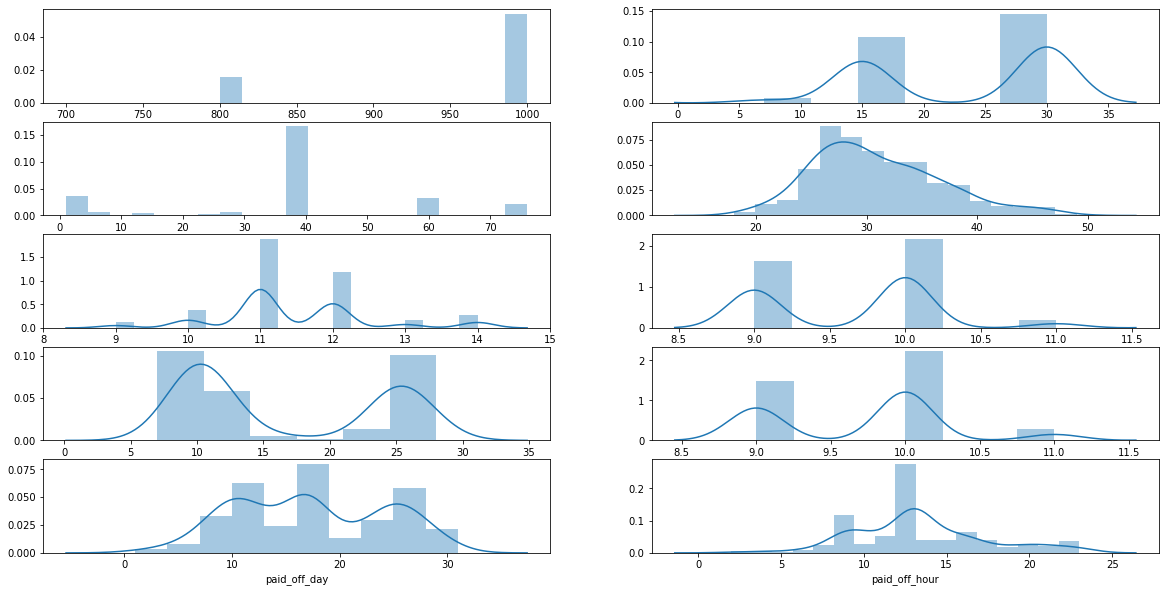

In [81]:
 col=data.drop(["loan_status","education","Gender"],axis=1)
fig, ax = plt.subplots(5,2, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.distplot(data[var], ax=subplot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

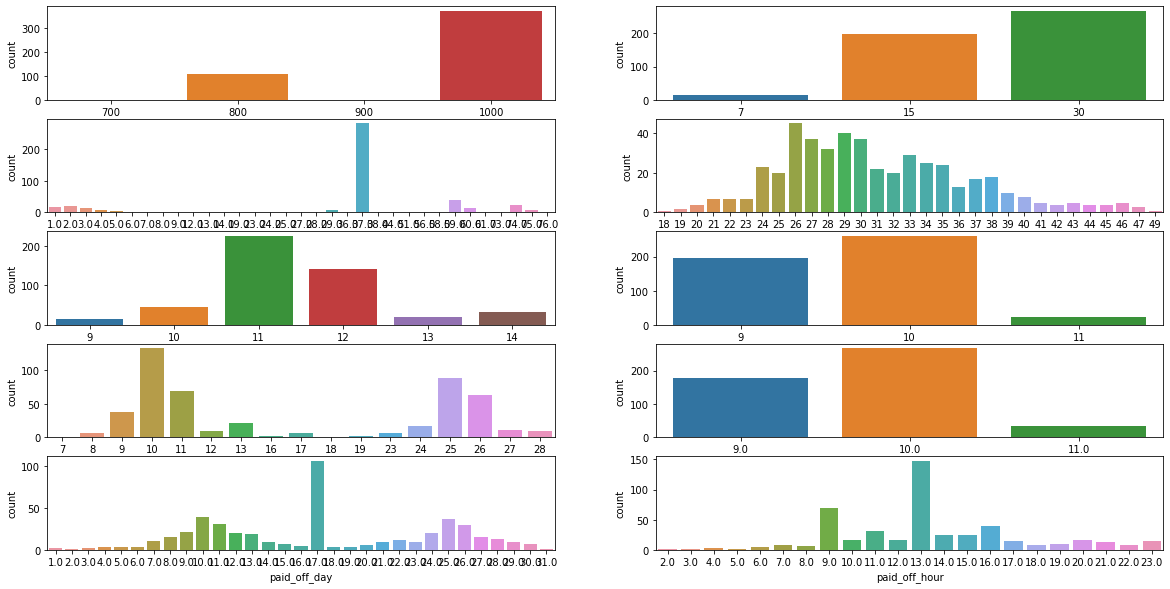

In [82]:
col=data.drop(["loan_status","education","Gender"],axis=1)
fig, ax = plt.subplots(5,2, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.countplot(data[var], ax=subplot)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

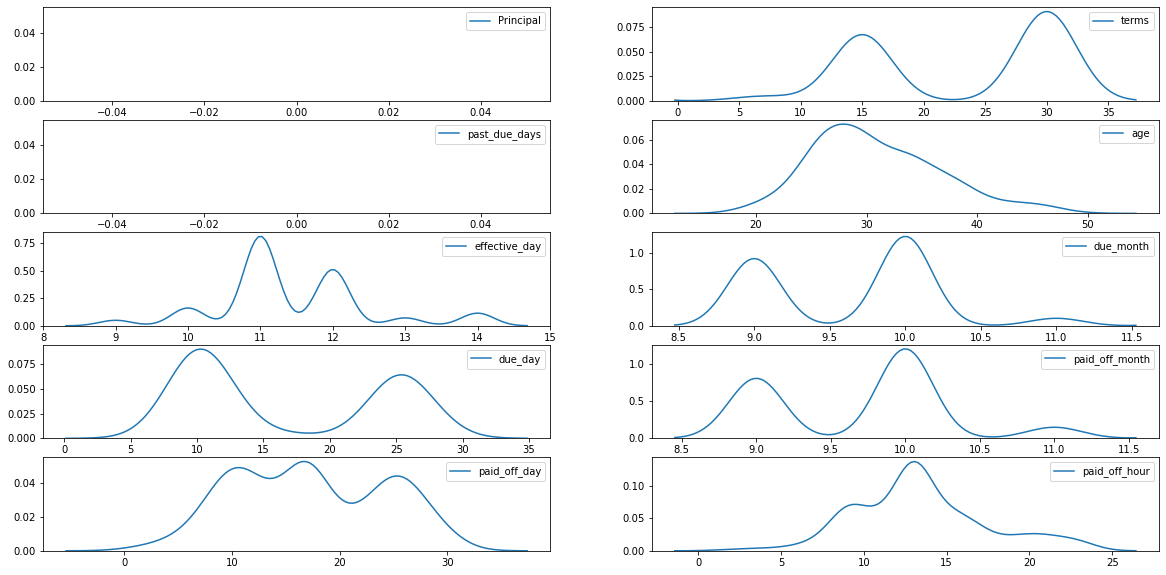

In [83]:
col=data.drop(["loan_status","education","Gender"],axis=1)
fig, ax = plt.subplots(5,2, figsize=(20, 10))
for var, subplot in zip(col, ax.flatten()):
    sns.kdeplot(data[var], ax=subplot)

<IPython.core.display.Javascript object>

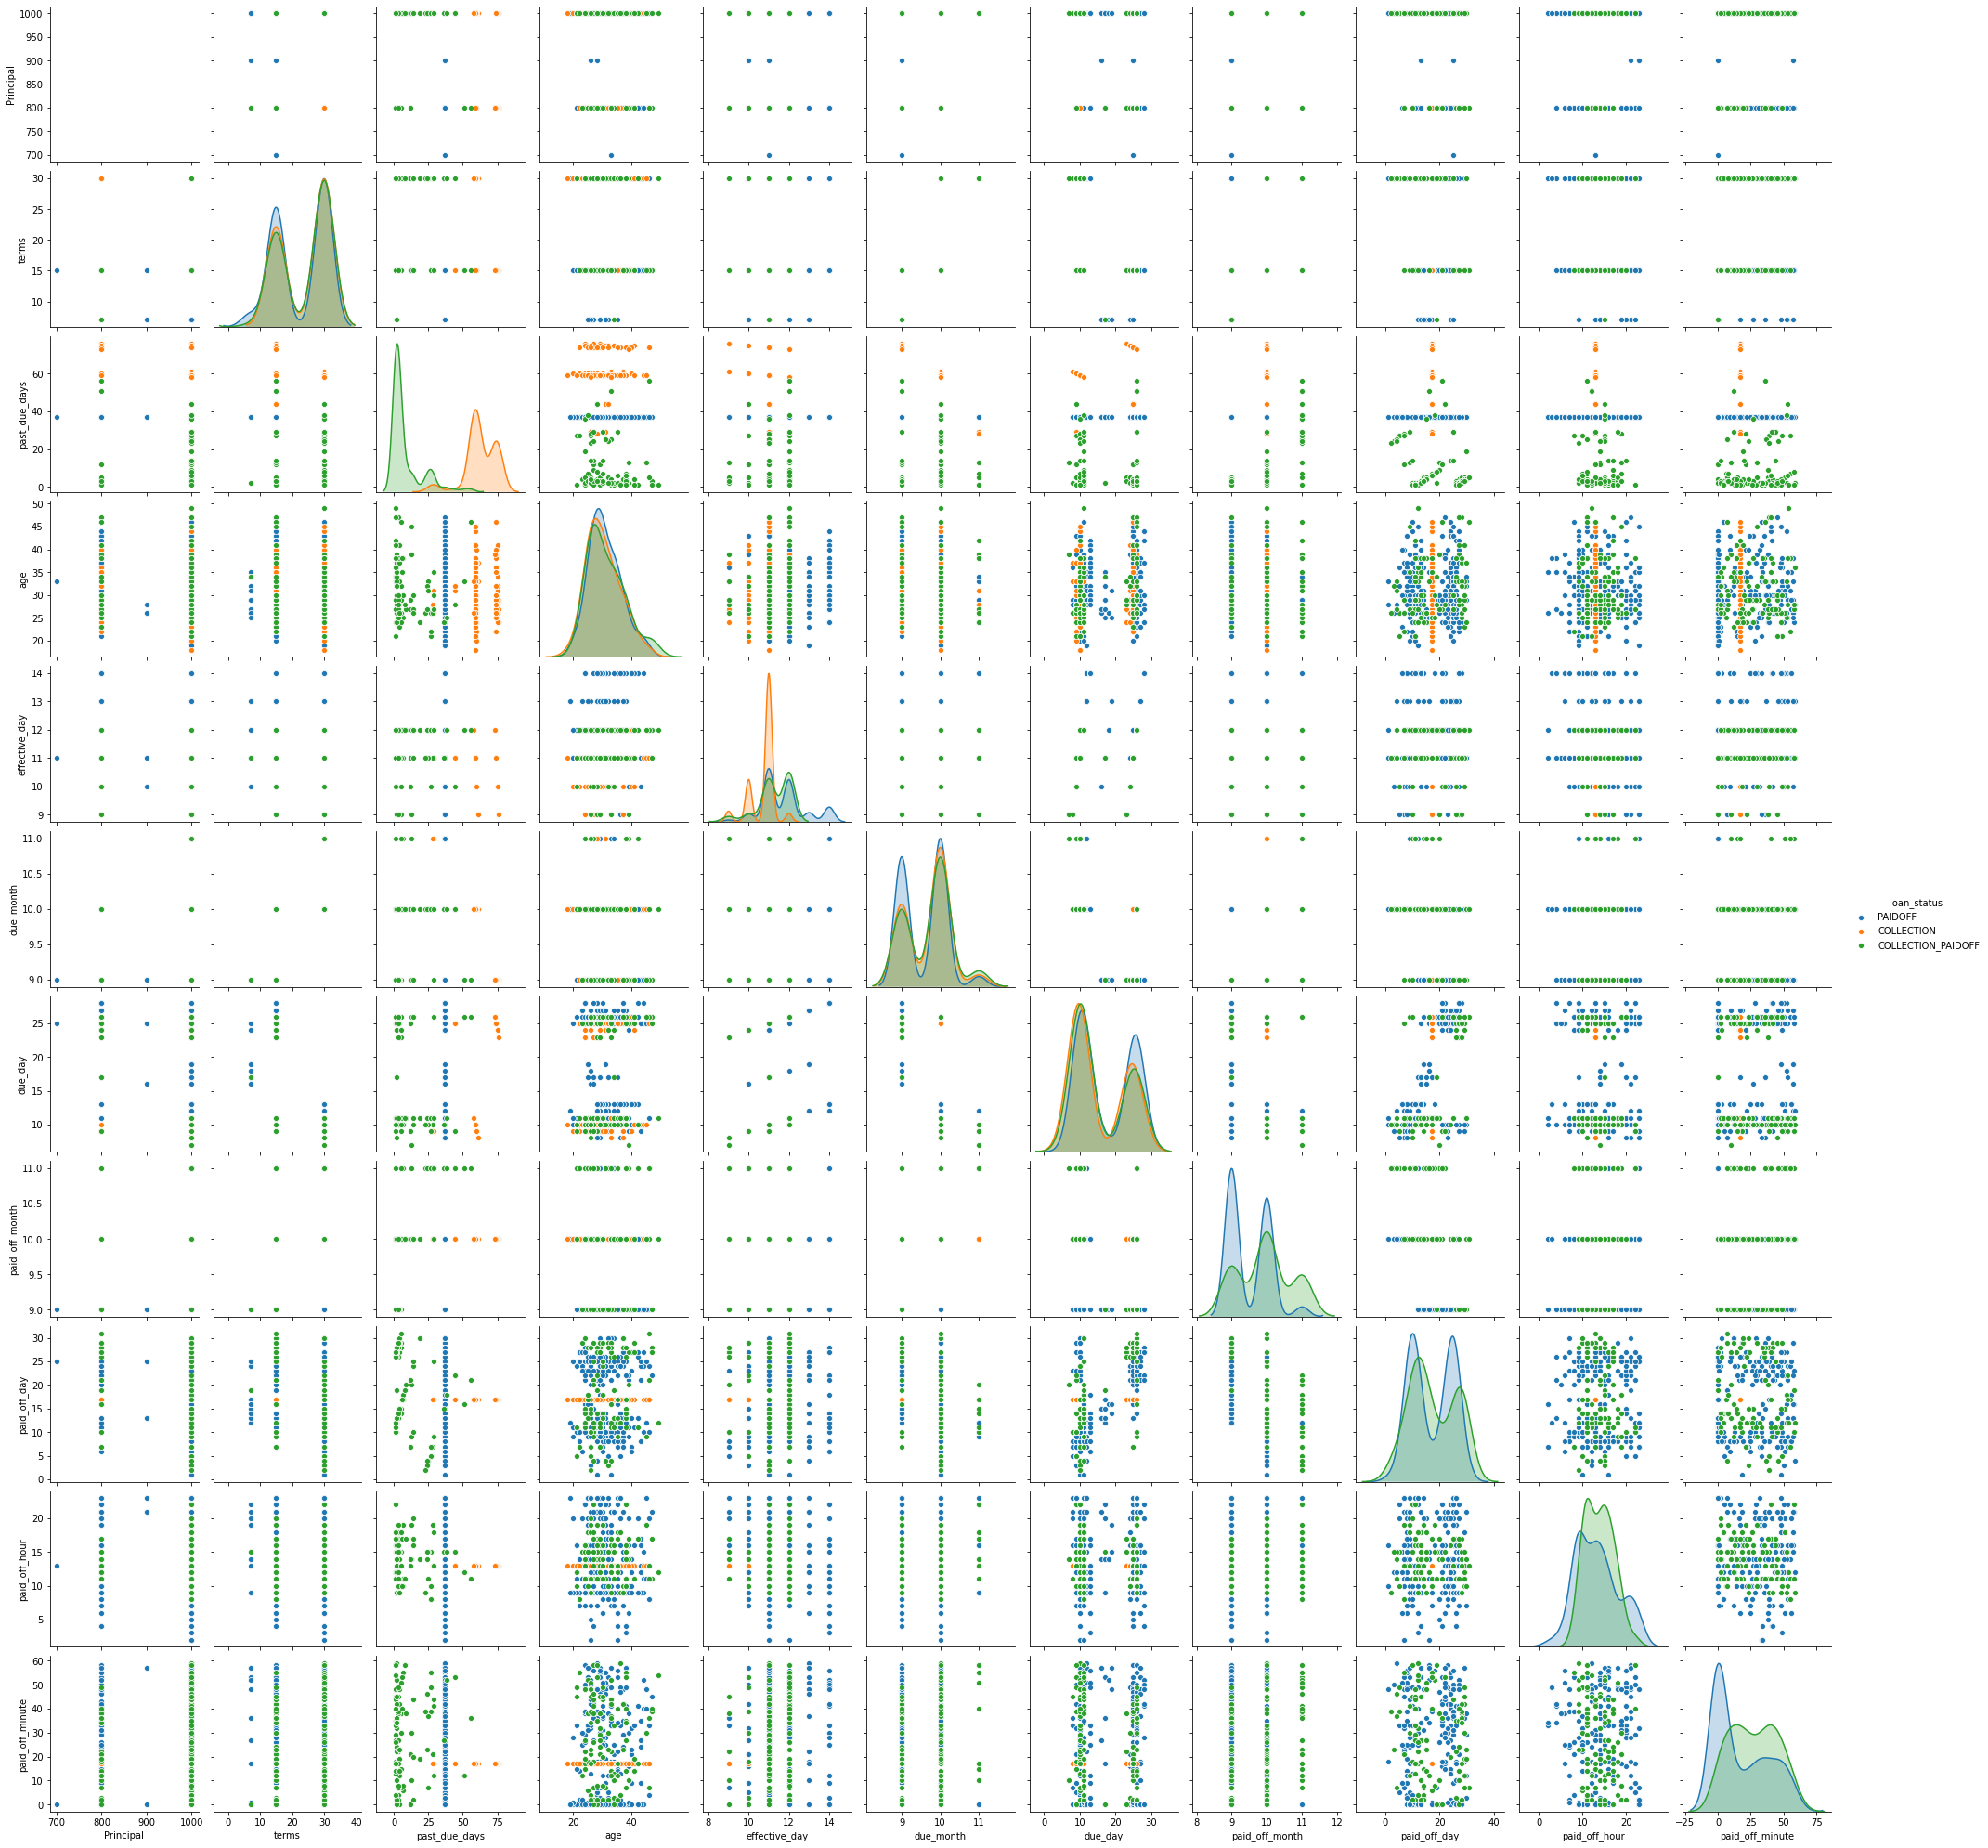

In [84]:
sns.pairplot(data,hue='loan_status')


<IPython.core.display.Javascript object>

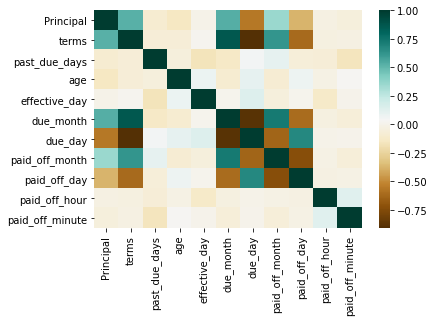

In [85]:
sns.heatmap(data.corr(),cmap="BrBG",annot=False)

# Labelling Categorical Variables

In [86]:
#Finding categorical variables
cat_data=data.select_dtypes(include=object)
cat_data.head(3)

,loan_status,education,Gender
4,PAIDOFF,college,female
6,PAIDOFF,college,male
7,PAIDOFF,college,male


In [87]:
#Finding Numerical Variables
num_data=data.select_dtypes(exclude=object)
num_data.head(3)

,Principal,terms,past_due_days,age,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
4,1000,30,37.0,28,9,10,8,9.0,23.0,21.0,36.0
6,1000,30,37.0,29,9,10,8,10.0,7.0,23.0,7.0
7,1000,30,37.0,36,9,10,8,10.0,5.0,20.0,33.0


In [88]:
#importing lable encoder
from sklearn.preprocessing import LabelEncoder

In [89]:
lb=LabelEncoder()

In [90]:
cat_data=cat_data.apply(lb.fit_transform)
cat_data

,loan_status,education,Gender
4,2,3,0
6,2,3,1
7,2,3,1
8,2,3,1
9,2,3,1
...,...,...,...
495,1,1,1
496,1,1,1
497,1,3,1
498,1,3,0


This label encoder assign the numerical values(binary) to the categorical variables based on alphabetical order
eg: male ,female .according to dictionary female comes first hence it is labelled as zero and male labelled as one

In [91]:
frames=[cat_data,num_data]

In [92]:
data=pd.concat(frames,axis=1)
data.head(5)

<IPython.core.display.Javascript object>

,loan_status,education,Gender,Principal,terms,past_due_days,age,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
4,2,3,0,1000,30,37.0,28,9,10,8,9.0,23.0,21.0,36.0
6,2,3,1,1000,30,37.0,29,9,10,8,10.0,7.0,23.0,7.0
7,2,3,1,1000,30,37.0,36,9,10,8,10.0,5.0,20.0,33.0
8,2,3,1,1000,30,37.0,28,9,10,8,10.0,8.0,16.0,0.0
9,2,3,1,800,15,37.0,26,10,9,24,9.0,24.0,13.0,0.0


# Standardization

In [93]:
x=data.drop(["loan_status"],axis=1)
y=data["loan_status"]

In [94]:
 #Scale x with a standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

<IPython.core.display.Javascript object>

In [95]:
x.head()

,education,Gender,Principal,terms,past_due_days,age,effective_day,due_month,due_day,paid_off_month,paid_off_day,paid_off_hour,paid_off_minute
0,1.073032,-2.358314,0.540350,0.878268,0.023785,-0.505658,-2.323010,0.639007,-1.157293,-1.175629,0.831601,1.909090,0.927888
1,1.073032,0.424032,0.540350,0.878268,0.023785,-0.332279,-2.323010,0.639007,-1.157293,0.515441,-1.474256,2.410986,-0.706564
2,1.073032,0.424032,0.540350,0.878268,0.023785,0.881373,-2.323010,0.639007,-1.157293,0.515441,-1.762488,1.658142,0.758806
3,1.073032,0.424032,0.540350,0.878268,0.023785,-0.505658,-2.323010,0.639007,-1.157293,0.515441,-1.330140,0.654351,-1.101087
4,1.073032,0.424032,-1.845157,-1.038608,0.023785,-0.852416,-1.366241,-1.120098,1.000734,-1.175629,0.975717,-0.098493,-1.101087


# Feature Selection

In [96]:
x=data.drop(["loan_status"],axis=1)
y=data["loan_status"]

In [97]:
from sklearn.feature_selection import chi2

In [98]:
chi_scores=chi2(x,y)
chi_scores

(array([7.17353315e-01, 4.70770222e-01, 5.53570499e+00, 9.65343136e+00,
        3.92398609e+03, 1.37627587e+00, 6.33271310e+00, 1.93587934e-01,
        2.51747849e+01, 2.70794442e+00, 9.06269920e-01, 2.80440879e+00,
        3.92560801e+02]),
 array([6.98600202e-01, 7.90266451e-01, 6.27967163e-02, 8.01279469e-03,
        0.00000000e+00, 5.02510906e-01, 4.21569151e-02, 9.07743012e-01,
        3.41479728e-06, 2.58212547e-01, 6.35632343e-01, 2.46053966e-01,
        5.70827969e-86]))

# Finding P values

In [99]:
p_values=pd.Series(chi_scores[1],index=x.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values

<IPython.core.display.Javascript object>

due_month          9.077430e-01
Gender             7.902665e-01
education          6.986002e-01
paid_off_day       6.356323e-01
age                5.025109e-01
paid_off_month     2.582125e-01
paid_off_hour      2.460540e-01
Principal          6.279672e-02
effective_day      4.215692e-02
terms              8.012795e-03
due_day            3.414797e-06
paid_off_minute    5.708280e-86
past_due_days      0.000000e+00
dtype: float64

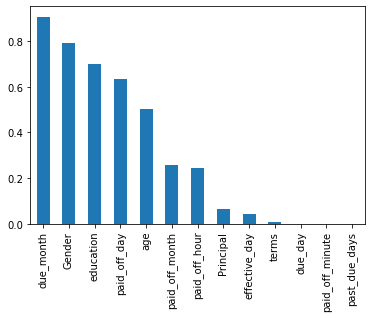

In [100]:
p_values.plot.bar()

# 4.MACHINE LEARNING

# Splitting data for training and testing

In [101]:
x1=data[['due_day','paid_off_minute','past_due_days']]

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3
                                               ,random_state=10)

In [104]:
x_train.head(3)

,due_day,paid_off_minute,past_due_days
206,10,0.0,37.0
449,10,29.0,1.0
384,10,17.0,59.0


In [105]:
y_train.head()

206    2
449    1
384    0
84     2
172    2
Name: loan_status, dtype: int32

In [106]:
x_test.head()

,due_day,paid_off_minute,past_due_days
233,11,1.0,37.0
195,11,49.0,37.0
473,11,2.0,3.0
358,10,17.0,59.0
325,10,17.0,59.0


In [107]:
y_test.head()

233    2
195    2
473    1
358    0
325    0
Name: loan_status, dtype: int32

In [108]:
x_train.shape,y_train.shape

((335, 3), (335,))

In [109]:
x_test.shape,y_test.shape

((144, 3), (144,))

# 1. Logistic Regression

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
model1=LogisticRegression()

In [112]:
model1.fit(x_train,y_train)

LogisticRegression()

In [113]:
y_pred=model1.predict(x_test)

In [114]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [115]:
model1.score(x_train,y_train)

0.9611940298507463

In [116]:
model1.score(x_test,y_test)

0.9722222222222222

In [117]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [118]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      0.90      0.95        31
           2       0.96      1.00      0.98        88

    accuracy                           0.97       144
   macro avg       0.99      0.95      0.97       144
weighted avg       0.97      0.97      0.97       144



In [120]:
confusion_matrix(y_test,y_pred)

array([[24,  0,  1],
       [ 0, 28,  3],
       [ 0,  0, 88]], dtype=int64)

In [121]:
a=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
a

<IPython.core.display.Javascript object>

,Actual,Predicted
233,2,2
195,2,2
473,1,1
358,0,0
325,0,0
...,...,...
474,1,1
93,2,2
484,1,1
110,2,2


In [122]:
a["Actual"].value_counts(),a["Predicted"].value_counts()

(2    88
 1    31
 0    25
 Name: Actual, dtype: int64,
 2    92
 1    28
 0    24
 Name: Predicted, dtype: int64)

# 2.KNN 

In [123]:
from sklearn.neighbors import KNeighborsClassifier

In [124]:
model2=KNeighborsClassifier(3)

In [125]:
model2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [126]:
y_pred=model2.predict(x_test)
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [127]:
model2.score(x_train,y_train)

0.9791044776119403

In [128]:
model2.score(x_test,y_test)

0.9791666666666666

In [129]:
from sklearn.metrics import accuracy_score,confusion_matrix,confusion_matrix, classification_report

In [130]:
accuracy_score(y_test,y_pred)

0.9791666666666666

In [131]:
confusion_matrix(y_test,y_pred)

array([[24,  0,  1],
       [ 0, 29,  2],
       [ 0,  0, 88]], dtype=int64)

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      0.94      0.97        31
           2       0.97      1.00      0.98        88

    accuracy                           0.98       144
   macro avg       0.99      0.97      0.98       144
weighted avg       0.98      0.98      0.98       144



In [133]:
b=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
b

<IPython.core.display.Javascript object>

,Actual,Predicted
233,2,2
195,2,2
473,1,1
358,0,0
325,0,0
...,...,...
474,1,1
93,2,2
484,1,1
110,2,2


In [134]:
b["Actual"].value_counts(),b["Predicted"].value_counts()

(2    88
 1    31
 0    25
 Name: Actual, dtype: int64,
 2    91
 1    29
 0    24
 Name: Predicted, dtype: int64)

# 3.Naive Bayes

In [135]:
from sklearn.naive_bayes import GaussianNB

In [136]:
model3=GaussianNB()

In [137]:
model3.fit(x_train,y_train)

GaussianNB()

In [138]:
y_pred=model3.predict(x_test)

In [139]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [140]:
model3.score(x_train,y_train)

1.0

In [141]:
model3.score(x_test,y_test)

1.0

In [142]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [143]:
accuracy_score(y_test,y_pred)

1.0

In [144]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        31
           2       1.00      1.00      1.00        88

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [145]:
confusion_matrix(y_test,y_pred)

array([[25,  0,  0],
       [ 0, 31,  0],
       [ 0,  0, 88]], dtype=int64)

In [146]:
A=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'Error':y_test-y_pred})
A

<IPython.core.display.Javascript object>

,Actual,Predicted,Error
233,2,2,0
195,2,2,0
473,1,1,0
358,0,0,0
325,0,0,0
...,...,...,...
474,1,1,0
93,2,2,0
484,1,1,0
110,2,2,0


In [147]:
A["Actual"].value_counts(),A["Predicted"].value_counts()

(2    88
 1    31
 0    25
 Name: Actual, dtype: int64,
 2    88
 1    31
 0    25
 Name: Predicted, dtype: int64)

# 4.Decision Tree

In [148]:
from sklearn.tree import DecisionTreeClassifier

In [149]:
 model4=DecisionTreeClassifier()

In [150]:
model4.fit(x_train,y_train)

DecisionTreeClassifier()

In [151]:
y_pred=model4.predict(x_test)

In [152]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [153]:
model4.score(x_train,y_train)

1.0

In [154]:
model4.score(x_test,y_test)

0.9861111111111112

In [155]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [156]:
accuracy_score(y_test,y_pred)

0.9861111111111112

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.94      0.97        31
           2       0.98      1.00      0.99        88

    accuracy                           0.99       144
   macro avg       0.99      0.98      0.99       144
weighted avg       0.99      0.99      0.99       144



In [158]:
confusion_matrix(y_test,y_pred)

array([[25,  0,  0],
       [ 0, 29,  2],
       [ 0,  0, 88]], dtype=int64)

In [159]:
c=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
c

<IPython.core.display.Javascript object>

,Actual,Predicted
233,2,2
195,2,2
473,1,1
358,0,0
325,0,0
...,...,...
474,1,1
93,2,2
484,1,1
110,2,2


# 5.Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
model5= RandomForestClassifier(n_estimators = 1000, random_state = 42)

In [162]:
model5.fit(x_train ,y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [163]:
y_pred=model5.predict(x_test)

In [164]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [165]:
model5.score(x_train,y_train)

1.0

In [166]:
model5.score(x_test,y_test)

0.9861111111111112

In [167]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [168]:
accuracy_score(y_test,y_pred)

0.9861111111111112

In [169]:
confusion_matrix(y_test,y_pred)

array([[25,  0,  0],
       [ 0, 29,  2],
       [ 0,  0, 88]], dtype=int64)

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.94      0.97        31
           2       0.98      1.00      0.99        88

    accuracy                           0.99       144
   macro avg       0.99      0.98      0.99       144
weighted avg       0.99      0.99      0.99       144



# 6.XgBoost

In [171]:
from xgboost import XGBClassifier

In [172]:
model6=XGBClassifier()

In [173]:
model6.fit(x_train,y_train)

[18:00:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [174]:
y_pred=model6.predict(x_test)

In [175]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [176]:
model6.score(x_train,y_train)

1.0

In [177]:
model6.score(x_test,y_test)

0.9861111111111112

In [178]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [179]:
accuracy_score(y_test,y_pred)

0.9861111111111112

In [180]:
confusion_matrix(y_test,y_pred)

array([[25,  0,  0],
       [ 0, 29,  2],
       [ 0,  0, 88]], dtype=int64)

In [181]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      0.94      0.97        31
           2       0.98      1.00      0.99        88

    accuracy                           0.99       144
   macro avg       0.99      0.98      0.99       144
weighted avg       0.99      0.99      0.99       144



# 7.AdaBoost

In [182]:
from sklearn.ensemble import AdaBoostClassifier

In [183]:
model7=AdaBoostClassifier(n_estimators=5,learning_rate=1)

In [184]:
model7.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=5)

In [185]:
y_pred=model7.predict(x_test)

In [186]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [187]:
model7.score(x_train,y_train)

0.9880597014925373

In [188]:
model7.score(x_test,y_test)

0.9722222222222222

In [189]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [190]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [191]:
confusion_matrix(y_test,y_pred)

array([[24,  1,  0],
       [ 1, 28,  2],
       [ 0,  0, 88]], dtype=int64)

In [192]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.97      0.90      0.93        31
           2       0.98      1.00      0.99        88

    accuracy                           0.97       144
   macro avg       0.97      0.95      0.96       144
weighted avg       0.97      0.97      0.97       144



# 8.SVM

In [193]:
from sklearn import svm

In [194]:
model8=svm.SVC()

In [195]:
model8.fit(x_train,y_train)

SVC()

In [196]:
y_pred=model8.predict(x_test)

In [197]:
y_pred

array([2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1])

In [198]:
model8.score(x_train,y_train)

0.9641791044776119

In [199]:
model8.score(x_test,y_test)

0.9722222222222222

In [200]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [201]:
accuracy_score(y_test,y_pred)

0.9722222222222222

In [202]:
confusion_matrix(y_test,y_pred)

array([[24,  0,  1],
       [ 0, 28,  3],
       [ 0,  0, 88]], dtype=int64)

In [203]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       1.00      0.90      0.95        31
           2       0.96      1.00      0.98        88

    accuracy                           0.97       144
   macro avg       0.99      0.95      0.97       144
weighted avg       0.97      0.97      0.97       144



   MODEL NAME                     ACCURACY SCORE
    
Logistic Regression               97.2
KNN Classification                97.9
Naives Bayes                      100.0
Decision Tree                     98.6
Random Forest                     98.6
XgBoost                           98.6
AdaBoost                          97.2
SVM                               97.2